## Importing the datasets and relevant packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
choice_95 = pd.DataFrame(pd.read_csv('data/choice_95.csv'))
index_95 = pd.DataFrame(pd.read_csv('data/index_95.csv'))
win_95 = pd.DataFrame(pd.read_csv('data/wi_95.csv'))
loss_95 = pd.DataFrame(pd.read_csv('data/lo_95.csv'))

## Manually checking if the rewards/losses are the same for each choice

In [32]:
for i in range(0,15):
    print([choice_95.iloc[i,0], win_95.iloc[i,0],loss_95.iloc[i,0]])

[2, 100, 0]
[1, 100, 0]
[3, 50, 0]
[4, 50, 0]
[1, 100, 0]
[1, 100, 0]
[1, 100, 0]
[4, 50, 0]
[1, 100, 0]
[4, 50, 0]
[3, 50, 0]
[4, 50, 0]
[1, 100, 0]
[1, 100, 0]
[1, 100, 0]


In [29]:
for i in range(0,15):
    print([choice_95.iloc[i,1], win_95.iloc[i,1],loss_95.iloc[i,1]])

[2, 100, 0]
[2, 100, 0]
[4, 50, 0]
[3, 50, 0]
[2, 100, 0]
[2, 100, 0]
[2, 100, 0]
[2, 100, 0]
[2, 100, 0]
[2, 100, 0]
[3, 50, 0]
[4, 50, 0]
[1, 100, 0]
[2, 100, 0]
[2, 100, 0]


In [30]:
for i in range(0,15):
    print([choice_95.iloc[i,2], win_95.iloc[i,2],loss_95.iloc[i,2]])

[2, 100, 0]
[3, 50, 0]
[3, 50, 0]
[1, 100, 0]
[3, 50, 0]
[1, 100, 0]
[3, 50, 0]
[1, 100, 0]
[1, 100, 0]
[2, 100, 0]
[3, 50, -50]
[4, 50, 0]
[4, 50, 0]
[3, 50, 0]
[3, 50, 0]


They seem to be almost identical for every player, except for player 11, who was the only one that chose the 3rd choice and received a loss of 50.

## Deeper Analysis of Rewards v. Loss for each choice

These for loops were created to check the consistency of the reward/loss value. Initial values were selected by exploring the win_95 and loss_95 tables.

In [9]:
for subject in range(0,15):
    for round in range(0,95):
        if choice_95.iloc[subject][round] == 1 and win_95.iloc[subject][round] != 100:
            print("Not true for subject" + (subject+1) + "in round" + round)
        elif choice_95.iloc[subject][round] == 2 and win_95.iloc[subject][round] != 100:
            print("Not true for subject" + (subject+1) + "in round" + round)
        elif choice_95.iloc[subject][round] == 3 and win_95.iloc[subject][round] != 50:
            print("Not true for subject" + (subject+1) + "in round" + round)
        elif choice_95.iloc[subject][round] == 4 and win_95.iloc[subject][round] != 50:
            print("Not true for subject" + (subject+1) + "in round" + round)
# No output indicates that all choices of 1 and 2 yield 100 and all choices of 3 and 4 yield 50

In [30]:
for subject in range(0,15):
    for round in range(0,95):
        if choice_95.iloc[subject][round] == 1 and loss_95.iloc[subject][round] not in [0,-150,-200,-250,-300,-350]:
            print("Not true for subject" + str(subject) + " for choice 1 in round " + str(round) + " with a loss of " + str(loss_95.iloc[subject][round]))
        if choice_95.iloc[subject][round] == 2 and loss_95.iloc[subject][round] not in [0,-1250]:
            print("Not true for subject" + str(subject) + " for choice 2 in round " + str(round) + " with a loss of " + str(loss_95.iloc[subject][round]))
        if choice_95.iloc[subject][round] == 3 and loss_95.iloc[subject][round] not in [0,-25,-50,-75]:
            print("Not true for subject" + str(subject) + " for choice 3 in round " + str(round) + " with a loss of " + str(loss_95.iloc[subject][round]))
        if choice_95.iloc[subject][round] == 4 and loss_95.iloc[subject][round] not in [-250,0]:
            print("Not true for subject" + str(subject) + " for choice 4 in round " + str(round) + " with a loss of " + str(loss_95.iloc[subject][round]))
            
# No output shows that the loss posibilities for each choice are limited

Choice 2 and 4 have  constant values for losses, at -1250 and -250 respectively
It seems that choice 1 has a varied loss system where players are losing [-150,-200,-250,-300,-350]
Choice 3 is also a mix of [-25,-50,-75]

# Analysing the proportion of Win v. Loss per Choice

## Choice 1

In [93]:
times_chosen = 0
times_loss = 0
losses = []
times_win = 0
wins = []
for subject in range(0,15):
    for round in range(0,95):
        choice_made = choice_95.iloc[subject][round]
        if choice_made == 1:
            times_chosen += 1
            loss = loss_95.iloc[subject][round]
            win = win_95.iloc[subject][round]
            if loss < 0:
                times_loss +=1
                losses.append(loss)
            if win > 0:
                times_win += 1
                wins.append(win)
            
print("times_chosen=", times_chosen)
print("times_loss=", times_loss)
print("times_win=", times_win)

times_chosen= 187
times_loss= 92
times_win= 187


In [48]:
def freq(losses):
    frequency = {}
    for loss in losses:
        if frequency.get(loss):
            frequency[loss] += 1
        else:
            frequency[loss] = 1
    return frequency

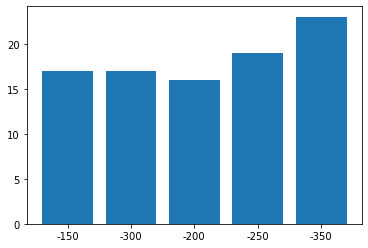

In [49]:
frequency = freq(losses)
loss = list(frequency.keys())
count = list(frequency.values())
plt.bar(range(len(frequency)), count, tick_label=loss)
plt.show()

In [94]:
sum(losses)/len(losses)

-257.0652173913044

The players chose choice 1 in 13.13% (187/1425) of the rounds. 

When choosing choice 1, the players had a 49.2% (92/187) chance of making a loss.

The loss made by a player was either 150, 200, 250, 300 or 350, and these were evenly distributed, with an average loss of 257.07

The rewards for winning was 100 every time.

The total rewards and losses made by all players combined is a winning of 18,700 and a loss of 23,650

## Choice 2

In [53]:
times_chosen = 0
times_loss = 0
losses = []
times_win = 0
wins = []
for subject in range(0,15):
    for round in range(0,95):
        choice_made = choice_95.iloc[subject][round]
        if choice_made == 2:
            times_chosen += 1
            loss = loss_95.iloc[subject][round]
            win = win_95.iloc[subject][round]
            if loss < 0:
                times_loss +=1
                losses.append(loss)
            if win > 0:
                times_win += 1
                wins.append(win)
            
print("times_chosen=", times_chosen)
print("times_loss=", times_loss)
print("times_win=", times_win)

times_chosen= 425
times_loss= 46
times_win= 425


The players chose choice 2 in 29.82% (425/1425) of the rounds. 

When choosing choice 2, the players had a 10.82% (46/425) chance of making a loss.

The rewards for winning was 100 every time, and the loss made was always 1250.

The total rewards and losses made by all players combined is a winning of 42,500 and a loss of 57,500

## Choice 3

In [90]:
times_chosen = 0
times_loss = 0
losses = []
times_win = 0
wins = []
for subject in range(0,15):
    for round in range(0,95):
        choice_made = choice_95.iloc[subject][round]
        if choice_made == 3:
            times_chosen += 1
            loss = loss_95.iloc[subject][round]
            win = win_95.iloc[subject][round]
            if loss < 0:
                times_loss +=1
                losses.append(loss)
            if win > 0:
                times_win += 1
                wins.append(win)
            
print("times_chosen=", times_chosen)
print("times_loss=", times_loss)
print("times_win=", times_win)

times_chosen= 194
times_loss= 92
times_win= 194


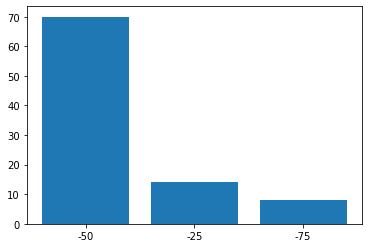

In [91]:
frequency = freq(losses)
loss = list(frequency.keys())
count = list(frequency.values())
plt.bar(range(len(frequency)), count, tick_label=loss)
plt.show()

In [92]:
sum(losses)/len(losses)

-48.369565217391305

The players chose choice 3 in 13.61% (194/1425) of the rounds. 

When choosing choice 3, the players had a 47.42% (92/194) chance of making a loss
.

The loss made by a player was either 25, 50 or 75, and the loss was 50 almost 70% of the time, with an avergae loss of 48.37

The rewards for winning was 50 every time.

The total rewards and losses made by all players combined is a winning of 9,700 and a loss of 4,450

## Choice 4

In [70]:
times_chosen = 0
times_loss = 0
losses = []
times_win = 0
wins = []
for subject in range(0,15):
    for round in range(0,95):
        choice_made = choice_95.iloc[subject][round]
        if choice_made == 4:
            times_chosen += 1
            loss = loss_95.iloc[subject][round]
            win = win_95.iloc[subject][round]
            if loss < 0:
                times_loss +=1
                losses.append(loss)
            if win > 0:
                times_win += 1
                wins.append(win)
            
print("times_chosen=", times_chosen)
print("times_loss=", times_loss)
print("times_win=", times_win)

times_chosen= 619
times_loss= 60
times_win= 619


The players chose choice 4 in 43.44% (619/1425) of the rounds. 

When choosing choice 4, the players had a 9.69% (60/619) chance of making a loss.

The rewards for winning was 50 every time, and the loss made was always 250.

The total rewards and losses made by all players combined is a winning of 30,950 and a loss of 15,000

## Overall Comparison

In [100]:
times_chosen = {1:13.13, 2:29.82, 3:13.61, 4:43.44}

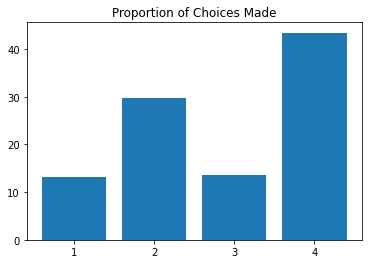

In [101]:
choice = list(times_chosen.keys())
proportion = list(times_chosen.values())
plt.bar(range(len(times_chosen)), proportion, tick_label=choice)
plt.title("Proportion of Choices Made")
plt.show()

In [87]:
risk_loss = {1:49.2, 2:10.82, 3:47.42, 4:9.69}

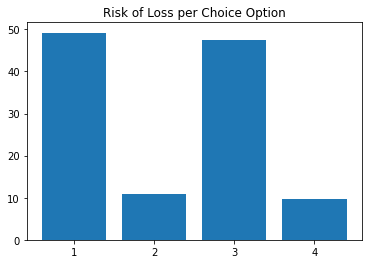

In [98]:
choice = list(risk_loss.keys())
risk = list(risk_loss.values())
plt.bar(range(len(risk_loss)), risk, tick_label=choice)
plt.title("Risk of Loss per Choice Option")
plt.show()

In [106]:
avg_loss = {1:23650/187, 
            2:57500/425,
            3:4450/194,
            4:15000/619}

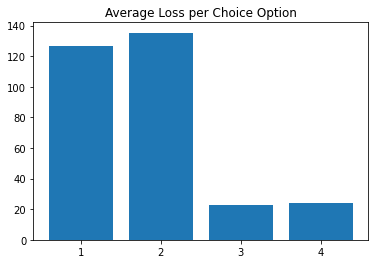

In [107]:
choice = list(avg_loss.keys())
avg = list(avg_loss.values())
plt.bar(range(len(avg_loss)), avg, tick_label=choice)
plt.title("Average Loss per Choice Option")
plt.show()

In [104]:
profit = {1:(18700-23650)/187,
          2:(42500-57500)/425,
          3:(9700-4450)/194,
          4:(30950-15000)/619}

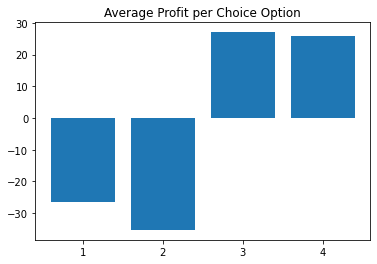

In [105]:
choice = list(profit.keys())
profits = list(profit.values())
plt.bar(range(len(profit)), profits, tick_label=choice)
plt.title("Average Profit per Choice Option")
plt.show()